# Output Cell Toggle Button

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# V. Cholera Model Integrator

In [45]:
### Initializations ###

%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as spy
from sympy import *
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
#import pymc3 as pm


### Initial Conditions ###

S0 = 400000       # Low / Mid Sized City
A0 = 0            # Initiallly No One Infected
I0 = 0            # Initiallly No One Infected
R0 = 0            # Initiallly No One Recoverded
V0 = 0            # Initiallly No One Vaccinated
BH0 = 5           # Some Initial Value Needed
BL0 = 5           # Some Initial Value Needed

V0 = np.array([S0, I0, A0, R0, V0, BH0, BL0])


### Parameter Definitions ###  

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

### System of Diff Eqs ###

def dX_dt(X, t=0):
    
    S = X[0]
    I = X[1]
    A = X[2]
    R = X[3]
    V = X[4]
    BH = X[5]
    BL = X[6]
    
    dS_dt = ((mu*S0))+(omega*R)+(epsilon*V)-(alpha*S*((BL)/(kL+BL)))-(alpha*S*((BH)/(kH+BH)))-(mu*S)-(tau*nu)
    dI_dt = ((1-p)*alpha*S*(BL/(kL+BL)))+((1-p)*alpha*S*((BH)/(kH+BH)))-(muC+mu+((1-theta)*gamma)+(theta*gamma*lam))*I
    dA_dt = (p*alpha*S*((BL)/(kL+BL))) + (p*alpha*S*((BH)/(kH+BH))) - (mu+gamma) * A
    dR_dt = (((1-theta)*gamma) + (theta*gamma*lam))*I + (gamma*A) - (mu+omega) * R
    dV_dt = (tau*nu) - (epsilon*V) - (mu*V)
    dBH_dt = ((phi*theta+(1-theta))*(xiS/W)*I) + ((xiA/W)*A) - (chi*BH)
    dBL_dt = (chi*BH) - (delta*BL)
    
    return np.array([dS_dt, dI_dt, dA_dt, dR_dt, dV_dt, dBH_dt, dBL_dt])


## System Integrations ###

A = 130
TS = (10 ** 4)                    
t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)
                 


# Previous Main Paper Plots & Figures

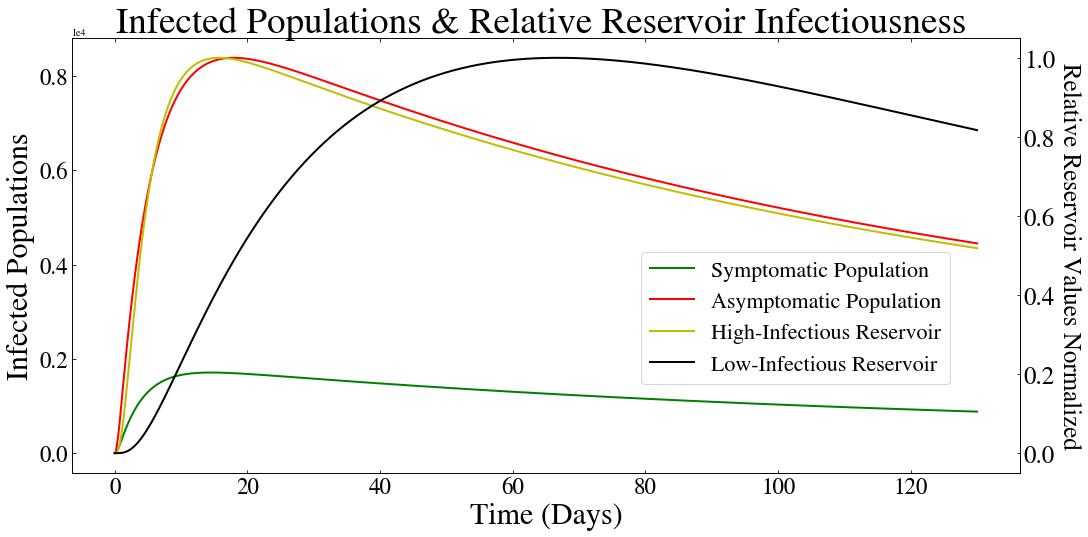

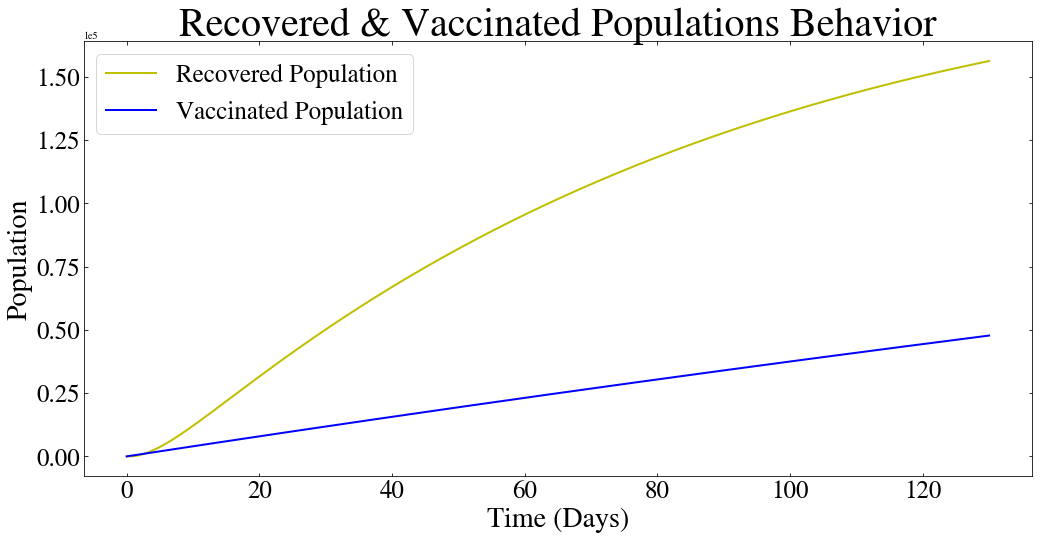

In [46]:
size1 = 2

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

fig, ax1 = plt.subplots(figsize=[17,8])
ax1.set_xlabel('Time (Days)', fontsize = '30')
ax1.set_ylabel('Infected Populations' , fontsize = '30')
lns1 = ax1.plot(t, ODEsSolved[:,1], 'g-', label='Symptomatic Population', linewidth=size1)
lns2 = ax1.plot(t, ODEsSolved[:,2], 'r-', label='Asymptomatic Population', linewidth=size1)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=23)
#ax1.yaxis.get_offset_text().set_fontsize(21)

ax2 = ax1.twinx()
ax2.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
ax2.set_ylabel('Relative Reservoir Values Normalized' , fontsize = '25', rotation=-90, labelpad = 26)
lns3 = ax2.plot(t, ODEsSolved[:,5]/max(ODEsSolved[:,5]), 'y-', label='High-Infectious Reservoir', linewidth=size1)
lns4 = ax2.plot(t, ODEsSolved[:,6]/max(ODEsSolved[:,6]), 'k-', label='Low-Infectious Reservoir', linewidth=size1)

lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=(0.60,0.205), prop={'size': 22})

plt.title('Infected Populations & Relative Reservoir Infectiousness ' , fontsize = '37')
plt.show()

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,3], 'y-', label='Recovered Population', linewidth=2)
plt.plot(t, ODEsSolved[:,4], 'b-', label='Vaccinated Population', linewidth=2)
#plt.xlim([0, .5])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (Days)', fontsize = '28')
plt.ylabel('Population' , fontsize = '28')
plt.title('Recovered & Vaccinated Populations Behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()


# Supplimental Plots and Figures

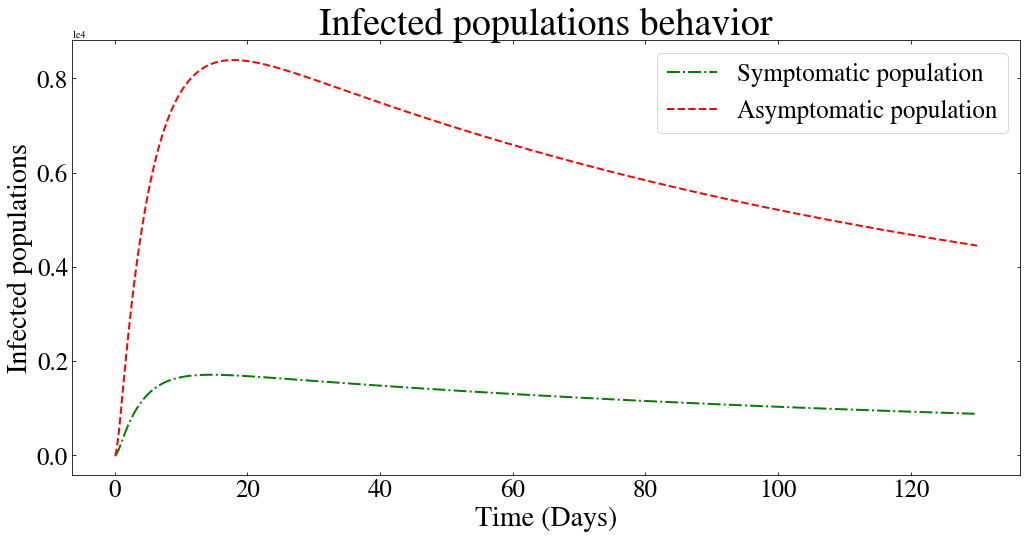

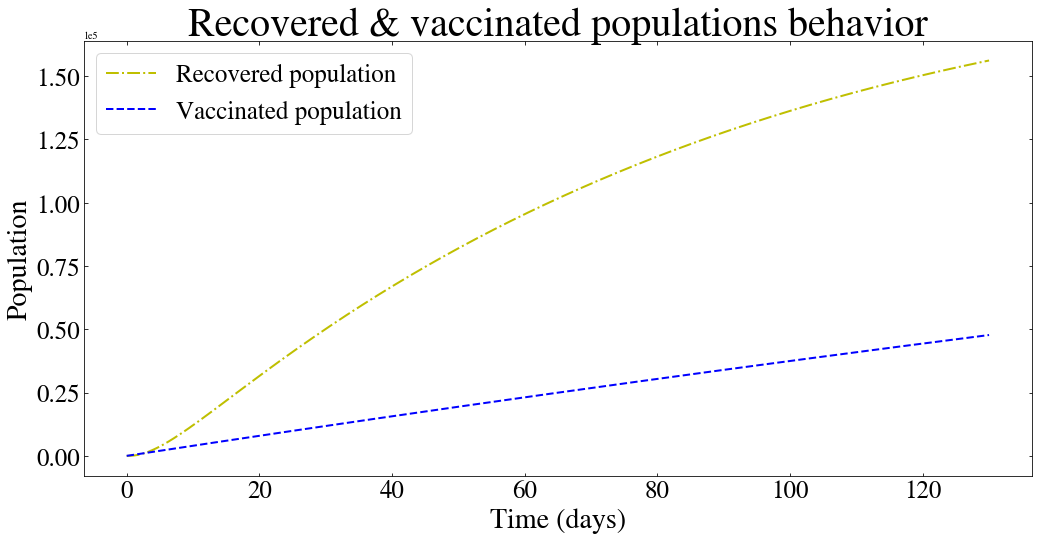

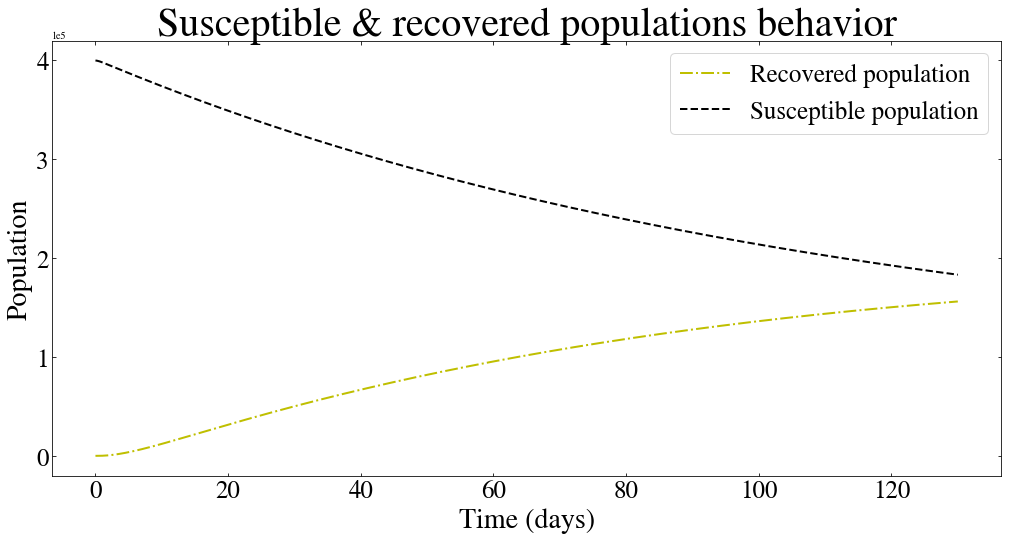

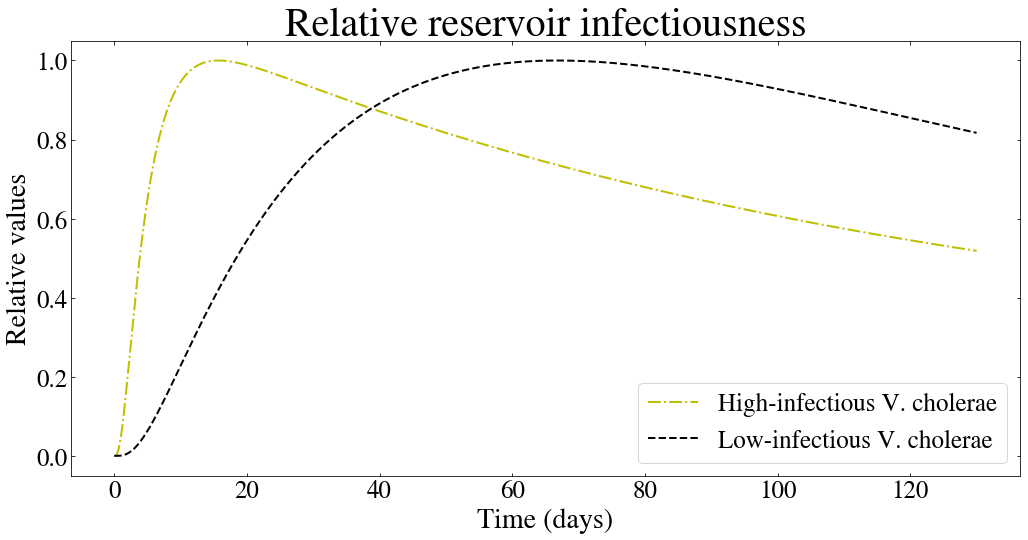

In [47]:
### Figures and Plots ###

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,1], 'g-', label='Symptomatic population', linewidth=2, linestyle='-.')
plt.plot(t, ODEsSolved[:,2], 'r-', label='Asymptomatic population', linewidth=2, linestyle='--')
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (Days)', fontsize = '28')
plt.ylabel('Infected populations' , fontsize = '28')
plt.title('Infected populations behavior' , fontsize = '38')
plt.legend(loc='best', prop={'size': 25})
plt.show()

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,3], 'y-', label='Recovered population', linewidth=2,linestyle='-.')
plt.plot(t, ODEsSolved[:,4], 'b-', label='Vaccinated population', linewidth=2,linestyle='--')
#plt.xlim([0, .5])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Population' , fontsize = '28')
plt.title('Recovered & vaccinated populations behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()


# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,3], 'y-', label='Recovered population', linewidth=2, linestyle='-.')
plt.plot(t, ODEsSolved[:,0], 'k-', label='Susceptible population', linewidth=2, linestyle='--')
linewidth=3
#plt.xlim([0, .5])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Population' , fontsize = '28')
plt.title('Susceptible & recovered populations behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,5]/max(ODEsSolved[:,5]), 'y-', label='High-infectious V. cholerae', linewidth=2,linestyle='-.')
plt.plot(t, ODEsSolved[:,6]/max(ODEsSolved[:,6]), 'k-', label='Low-infectious V. cholerae', linewidth=2,linestyle='--')
linewidth=3
#plt.xlim([0, 60])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Relative values' , fontsize = '28')
plt.title('Relative reservoir infectiousness' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()


# Long Term Suplimental Plots and Figures

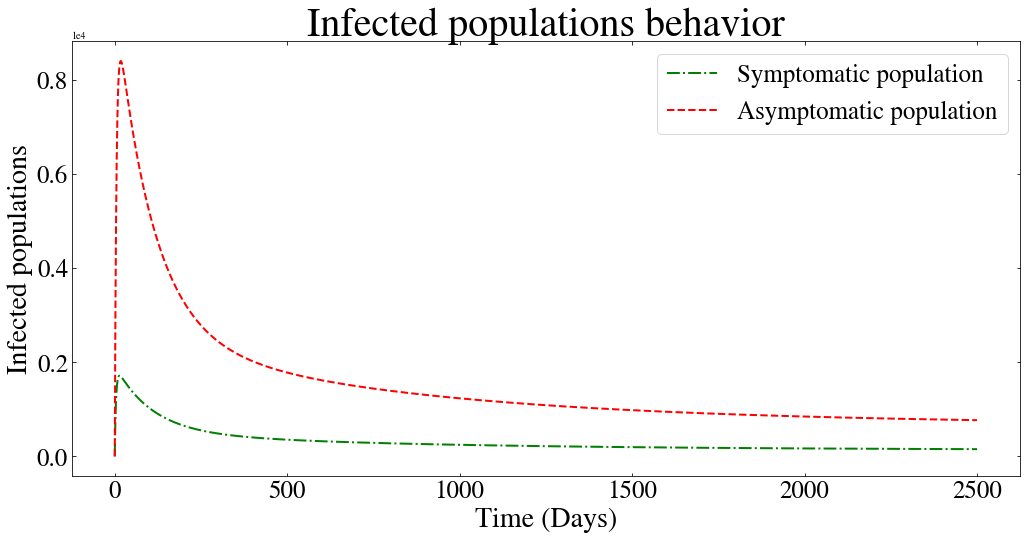

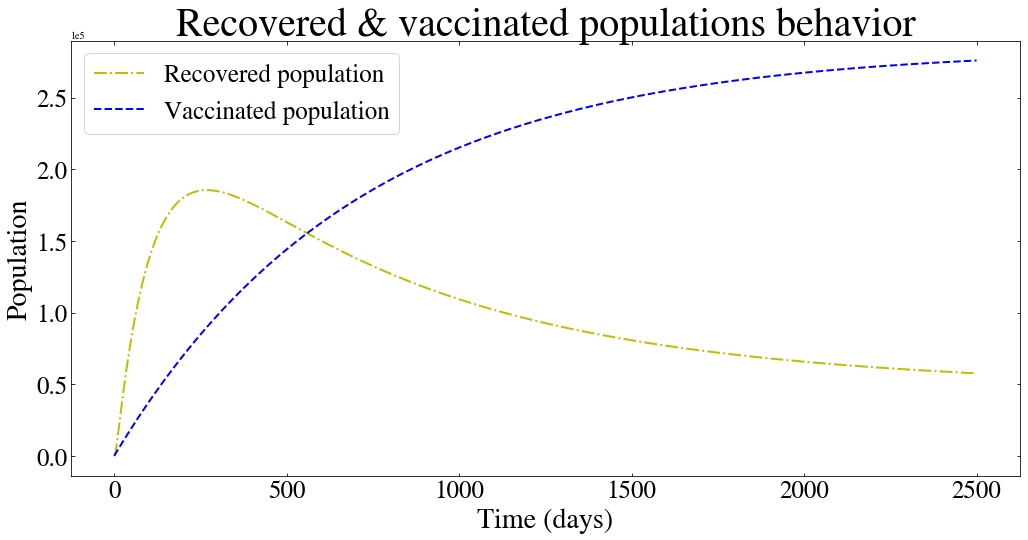

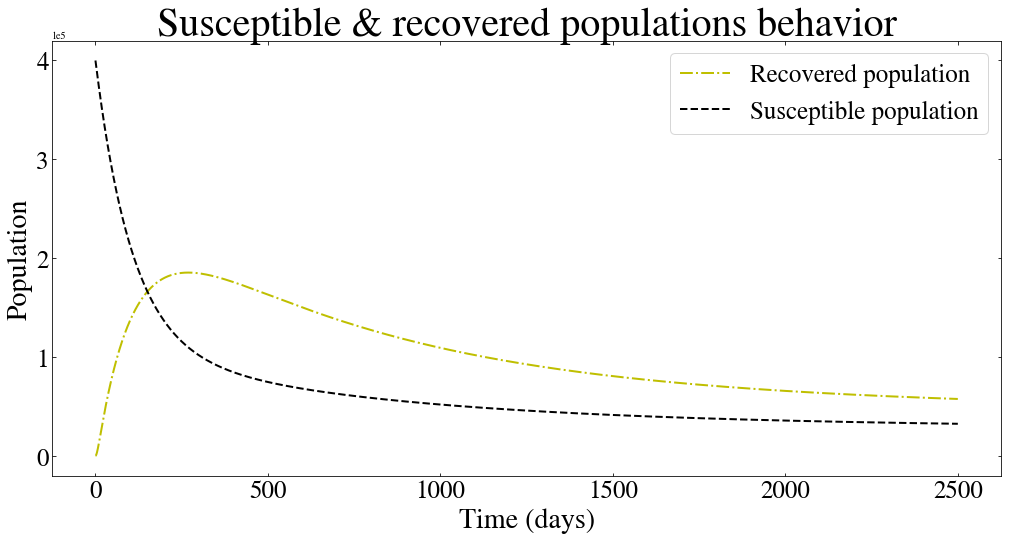

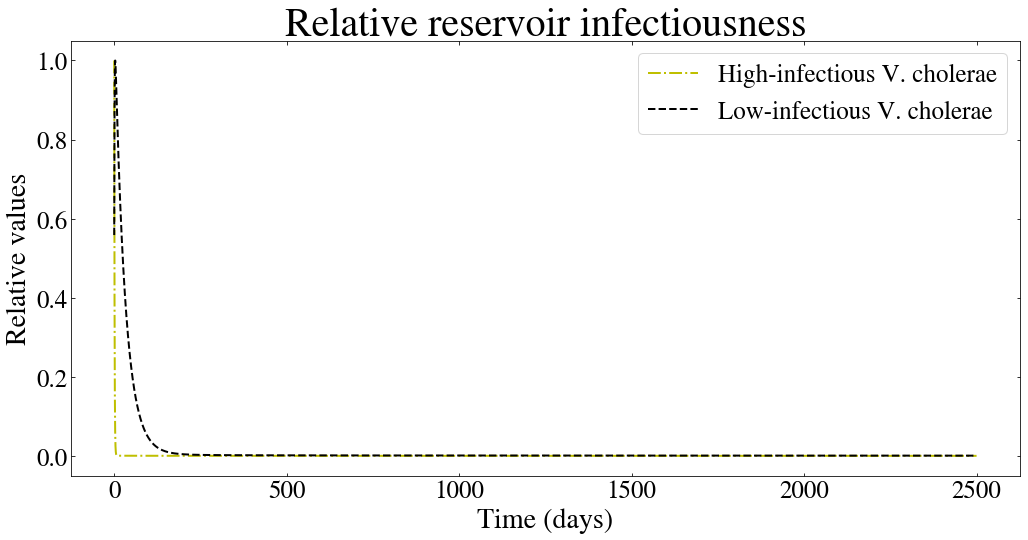

In [31]:
## System Integrations ###

A = 2500
TS = (10 ** 6)                    
t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

# -----------------------------------------------------------------------------------------------

### Figures and Plots ###

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'                       

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,1], 'g-', label='Symptomatic population', linewidth=2, linestyle='-.')
plt.plot(t, ODEsSolved[:,2], 'r-', label='Asymptomatic population', linewidth=2, linestyle='--')
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (Days)', fontsize = '28')
plt.ylabel('Infected populations' , fontsize = '28')
plt.title('Infected populations behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,3], 'y-', label='Recovered population', linewidth=2,linestyle='-.')
plt.plot(t, ODEsSolved[:,4], 'b-', label='Vaccinated population', linewidth=2,linestyle='--')
#plt.xlim([0, .5])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Population' , fontsize = '28')
plt.title('Recovered & vaccinated populations behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()


# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,3], 'y-', label='Recovered population', linewidth=2, linestyle='-.')
plt.plot(t, ODEsSolved[:,0], 'k-', label='Susceptible population', linewidth=2, linestyle='--')
linewidth=3
#plt.xlim([0, .5])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Population' , fontsize = '28')
plt.title('Susceptible & recovered populations behavior' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()

# -----------------------------------------------------------------------------------------------

plt.figure(figsize=[17,8])
plt.plot(t, ODEsSolved[:,5]/max(ODEsSolved[:,5]), 'y-', label='High-infectious V. cholerae', linewidth=2,linestyle='-.')
plt.plot(t, ODEsSolved[:,6]/max(ODEsSolved[:,6]), 'k-', label='Low-infectious V. cholerae', linewidth=2,linestyle='--')
linewidth=3
#plt.xlim([0, 60])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1, labelsize=25)
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Relative values' , fontsize = '28')
plt.title('Relative reservoir infectiousness' , fontsize = '40')
plt.legend(loc='best', prop={'size': 25})
plt.show()



# Preemptive Intervention Plot

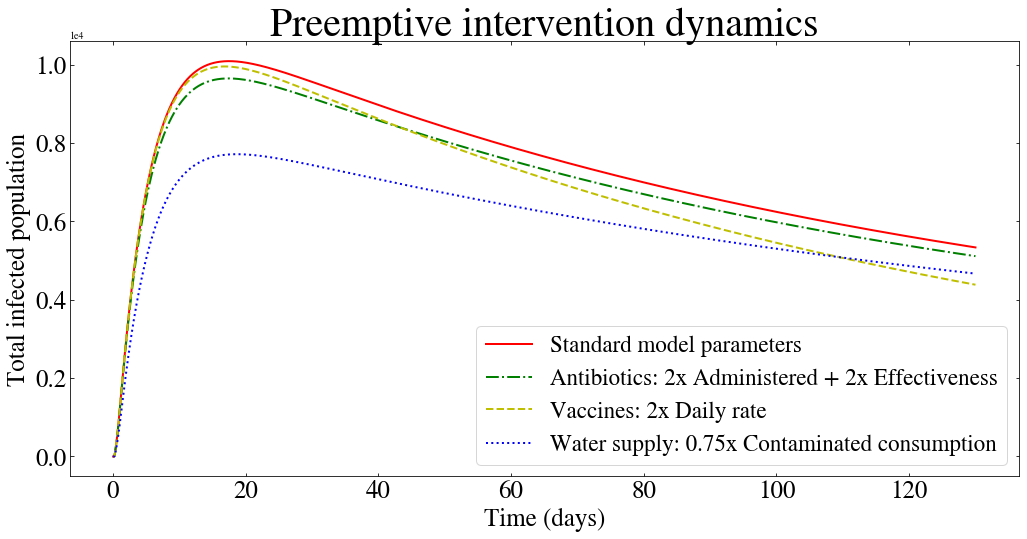

In [2]:
# Watch Out! Clear Before / After Running Redefines Parameters

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                   # [vaccines*d^-1], Rate of vaccination per day,
theta = theta*2           # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam *2              # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha             # [day^-1 person^-1], Rate of contaminated water consumption 
ODEsSolved1 = odeint(dX_dt, V0, t)
dTIAdt1 = ODEsSolved1[:,1] + ODEsSolved1[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 2               # [vaccines*d^-1], Rate of vaccination per day
theta = theta             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha             # [day^-1 person^-1], Rate of contaminated water consumption 
ODEsSolved2 = odeint(dX_dt, V0, t)
dTIAdt2 = ODEsSolved2[:,1] + ODEsSolved2[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                   # [vaccines*d^-1], Rate of vaccination per day
theta = theta             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha*0.75        # [day^-1 person^-1], Rate of contaminated water consumption 
ODEsSolved3 = odeint(dX_dt, V0, t)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]

plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
plt.plot(t[trim_ln:], dTIAdt1[trim_ln:], 'g-', label='Antibiotics: 2x Administered + 2x Effectiveness', linewidth=2, linestyle='-.')
plt.plot(t[trim_ln:], dTIAdt2[trim_ln:], 'y-', label='Vaccines: 2x Daily rate', linewidth=2, linestyle='--')
plt.plot(t[trim_ln:], dTIAdt3[trim_ln:], 'b-', label='Water supply: 0.75x Contaminated consumption', linewidth=2, linestyle=':')
#plt.axvline(x=30, linestyle = '--', color = 'black')
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '25')
plt.ylabel('Total infected population' , fontsize = '25')
plt.title('Preemptive intervention dynamics' , fontsize = '40')
plt.legend(loc='best', prop={'size': 23})
plt.show()


# Late Intervention Plots

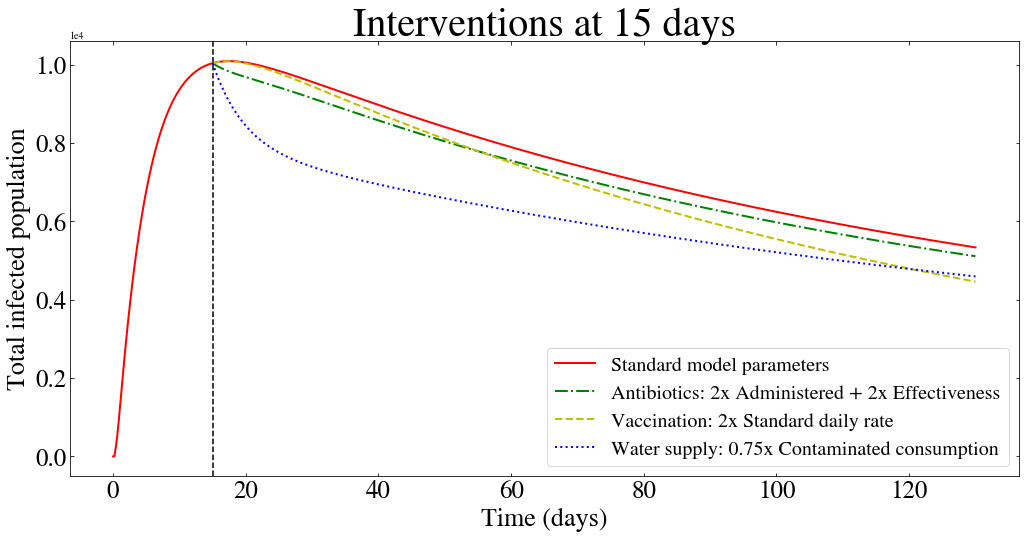

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 15
g = (TS-int(((TS/A)*day))) 

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

#day = 30
V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)
      
alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption
    
nu = nu                   # [vaccines*d^-1], Rate of vaccination per day,
theta = theta*2           # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam *2              # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha             # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper 
ODEsSolved1 = odeint(dX_dt, V0_2, t2)
dTIAdt1 = ODEsSolved1[:,1] + ODEsSolved1[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 2               # [vaccines*d^-1], Rate of vaccination per day
theta = theta             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha             # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved2 = odeint(dX_dt, V0_2, t2)
dTIAdt2 = ODEsSolved2[:,1] + ODEsSolved2[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                   # [vaccines*d^-1], Rate of vaccination per day
theta = theta             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha * 0.75      # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
plt.plot(t2[trim_ln:], dTIAdt1[trim_ln:], 'g-', label='Antibiotics: 2x Administered + 2x Effectiveness', linewidth=2, linestyle='-.')
plt.plot(t2[trim_ln:], dTIAdt2[trim_ln:], 'y-', label=r'Vaccination: 2x Standard daily rate', linewidth=2, linestyle='--')
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', label=r'Water supply: 0.75x Contaminated consumption', linewidth=2, linestyle=':')
plt.axvline(x=day, linestyle = '--', color = 'black')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '26')
plt.ylabel('Total infected population' , fontsize = '26')
plt.title('Interventions at 15 days' , fontsize = '40')
plt.legend(loc=4, prop={'size': 20})
plt.show()


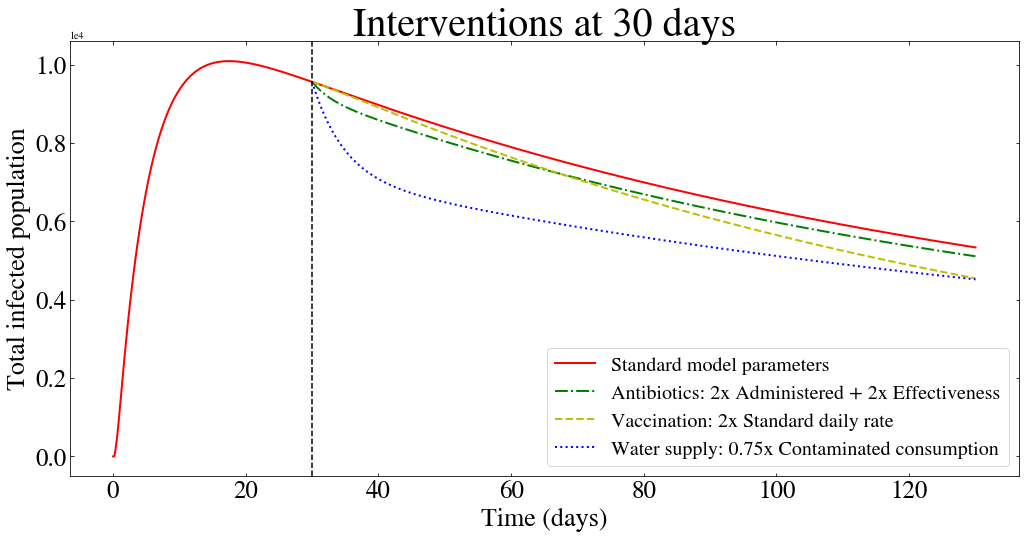

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 30
g = (TS-int(((TS/A)*day)))

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)
      
alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                     # [vaccines*d^-1], Rate of vaccination per day,
theta = theta*2             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam *2                # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha               # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper 
ODEsSolved1 = odeint(dX_dt, V0_2, t2)
dTIAdt1 = ODEsSolved1[:,1] + ODEsSolved1[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 2                 # [vaccines*d^-1], Rate of vaccination per day
theta = theta               # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                   # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha               # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved2 = odeint(dX_dt, V0_2, t2)
dTIAdt2 = ODEsSolved2[:,1] + ODEsSolved2[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                     # [vaccines*d^-1], Rate of vaccination per day
theta = theta               # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                   # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha * 0.75        # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
plt.plot(t2[trim_ln:], dTIAdt1[trim_ln:], 'g-', label='Antibiotics: 2x Administered + 2x Effectiveness', linewidth=2, linestyle='-.')
plt.plot(t2[trim_ln:], dTIAdt2[trim_ln:], 'y-', label=r'Vaccination: 2x Standard daily rate', linewidth=2, linestyle='--')
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', label=r'Water supply: 0.75x Contaminated consumption', linewidth=2, linestyle=':')
plt.axvline(x=day, linestyle = '--', color = 'black')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '26')
plt.ylabel('Total infected population' , fontsize = '26')
plt.title('Interventions at 30 days' , fontsize = '40')
plt.legend(loc=4, prop={'size': 20})
plt.show()


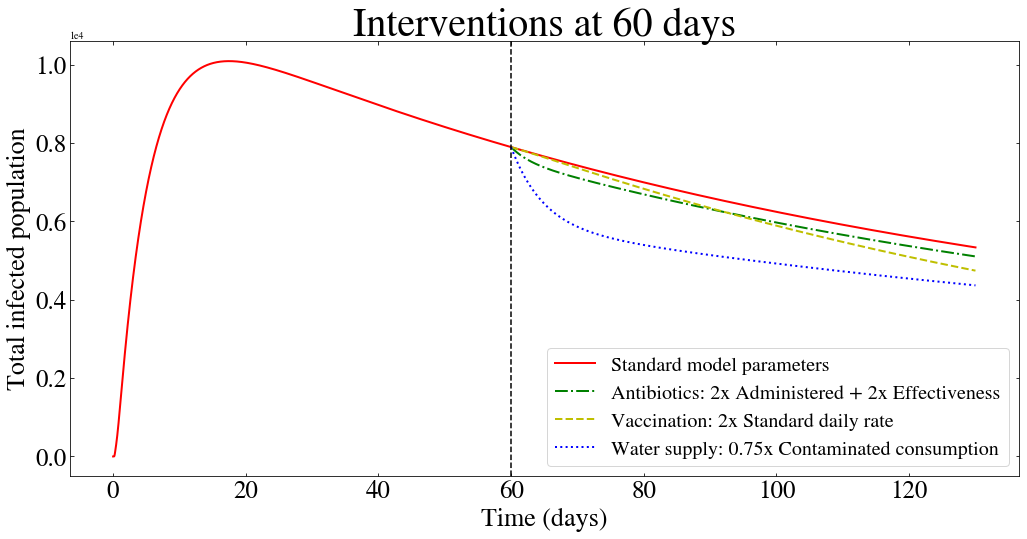

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 60
g = (TS-int(((TS/A)*day)))

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)
      
alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                     # [vaccines*d^-1], Rate of vaccination per day,
theta = theta*2             # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam *2                # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha               # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper 
ODEsSolved1 = odeint(dX_dt, V0_2, t2)
dTIAdt1 = ODEsSolved1[:,1] + ODEsSolved1[:,2]

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption
nu = nu * 2                 # [vaccines*d^-1], Rate of vaccination per day
theta = theta               # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                   # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha               # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved2 = odeint(dX_dt, V0_2, t2)
dTIAdt2 = ODEsSolved2[:,1] + ODEsSolved2[:,2]
 
alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu                     # [vaccines*d^-1], Rate of vaccination per day
theta = theta               # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam                   # [Unitless Preportion], Relative rate of recovery, receiving antbtics
alpha = alpha * 0.75        # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
plt.plot(t2[trim_ln:], dTIAdt1[trim_ln:], 'g-', label='Antibiotics: 2x Administered + 2x Effectiveness', linewidth=2, linestyle='-.')
plt.plot(t2[trim_ln:], dTIAdt2[trim_ln:], 'y-', label=r'Vaccination: 2x Standard daily rate', linewidth=2, linestyle='--')
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', label=r'Water supply: 0.75x Contaminated consumption', linewidth=2, linestyle=':')
plt.axvline(x=day, linestyle = '--', color = 'black')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '26')
plt.ylabel('Total infected population' , fontsize = '26')
plt.title('Interventions at 60 days' , fontsize = '40')
plt.legend(loc=4, prop={'size': 20})
plt.show()



# Combined Intervention Plots

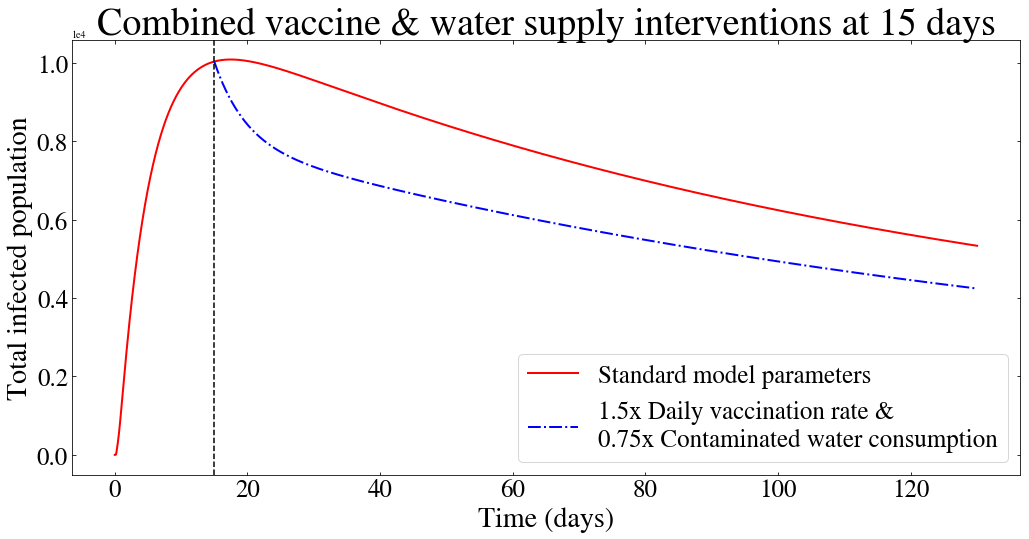

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 15
g = (TS-int(((TS/A)*day)))

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 1.5               # [vaccines*d^-1], Rate of vaccination per day
alpha = alpha * 0.75        # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
# plt.plot(t2[trim_ln:], dTIAdt1[trim_ln:], 'b-', label='Antibiotics: 2x Administered + 2x Effectiveness')
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', \
         label='1.5x Daily vaccination rate &\n0.75x Contaminated water consumption', linewidth=2, linestyle='-.')
plt.axvline(x=day, linestyle = '--', color = 'black')
linewidth=3
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Total infected population' , fontsize = '28')
plt.title('Combined vaccine & water supply interventions at 15 days' , fontsize = '38')
plt.legend(loc='best', prop={'size': 25})
plt.show()


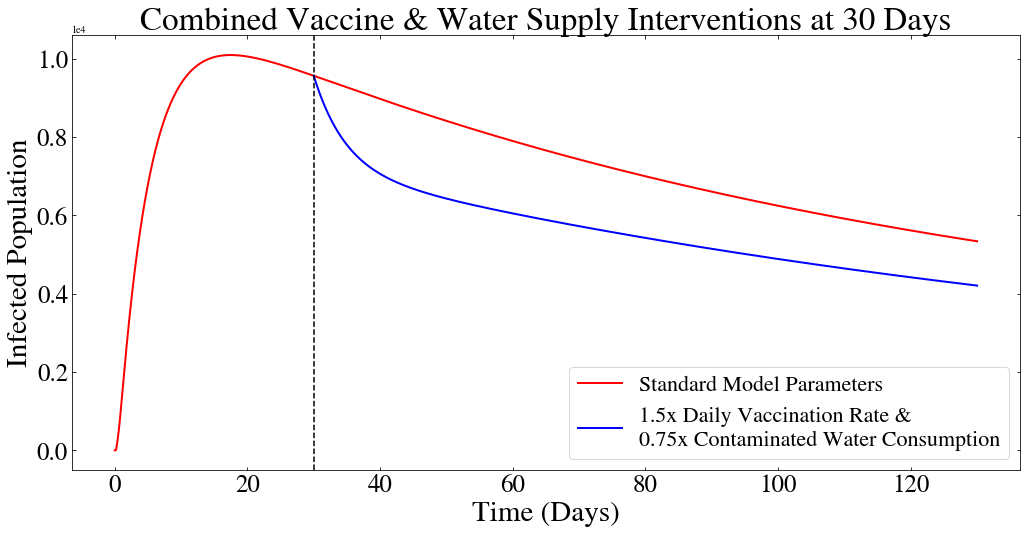

In [4]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 30
g = (TS-int(((TS/A)*day)))

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 1.5             # [vaccines*d^-1], Rate of vaccination per day
alpha = alpha * 0.75      # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard Model Parameters', linewidth=2)
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', \
         label='1.5x Daily Vaccination Rate &\n0.75x Contaminated Water Consumption', linewidth=2)
plt.axvline(x=day, linestyle = '--', color = 'black')
linewidth=3
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (Days)', fontsize = '29')
plt.ylabel('Infected Population' , fontsize = '29')
plt.title('Combined Vaccine & Water Supply Interventions at 30 Days' , fontsize = '33')
plt.legend(loc=4, prop={'size': 22})
plt.show()


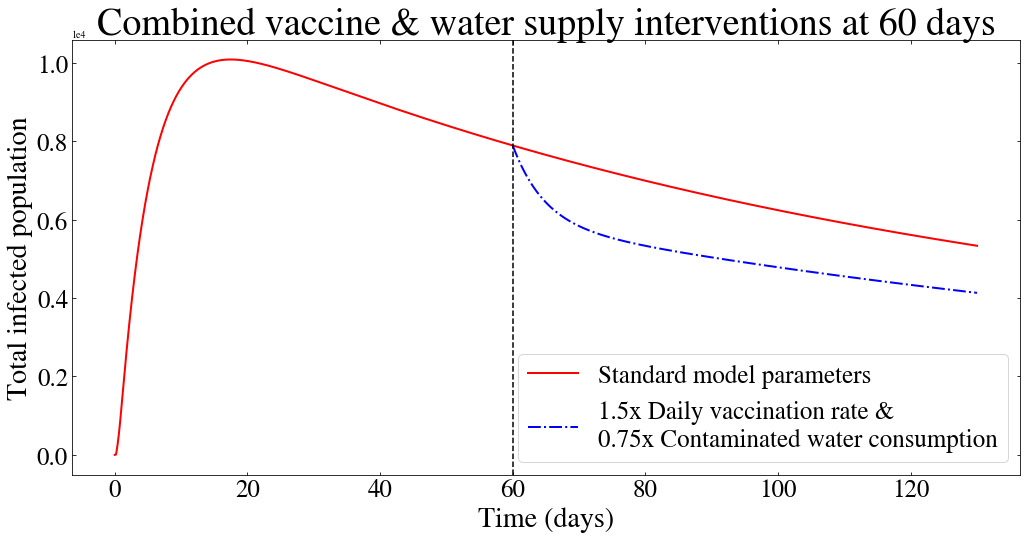

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

day = 60
g = (TS-int(((TS/A)*day)))

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])


t2 = np.linspace(day, A, g)

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

nu = nu * 1.5             # [vaccines*d^-1], Rate of vaccination per day
alpha = alpha * 0.75      # [day^-1 person^-1], Rate of contaminated water consumption From G.G. Kolaye et al. Paper
ODEsSolved3 = odeint(dX_dt, V0_2, t2)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
# plt.plot(t2[trim_ln:], dTIAdt1[trim_ln:], 'b-', label='Antibiotics: 2x Administered + 2x Effectiveness')
plt.plot(t2[trim_ln:], dTIAdt3[trim_ln:], 'b-', \
         label='1.5x Daily vaccination rate &\n0.75x Contaminated water consumption', linewidth=2, linestyle='-.')
plt.axvline(x=day, linestyle = '--', color = 'black')
linewidth=3
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Total infected population' , fontsize = '28')
plt.title('Combined vaccine & water supply interventions at 60 days' , fontsize = '38')
plt.legend(loc='best', prop={'size': 25})
plt.show()


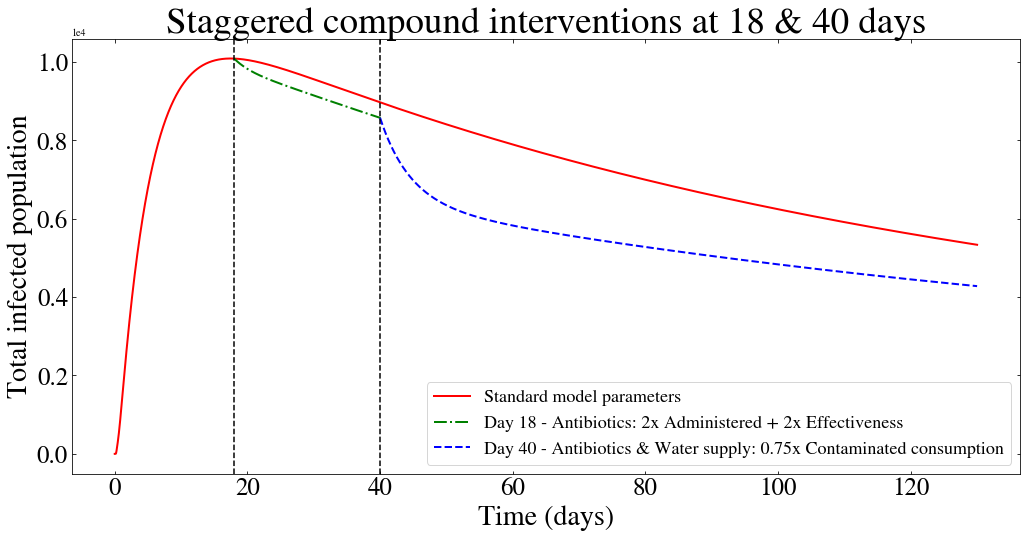

In [2]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

t = np.linspace(0, A, TS)
ODEsSolved = odeint(dX_dt, V0, t)

day = 18
g = (TS-int(((TS/A)*day)))

V0_2 = np.array([ODEsSolved[int(((TS/A)*day)),0], \
                 ODEsSolved[int(((TS/A)*day)),1], \
                 ODEsSolved[int(((TS/A)*day)),2], \
                 ODEsSolved[int(((TS/A)*day)),3], \
                 ODEsSolved[int(((TS/A)*day)),4], \
                 ODEsSolved[int(((TS/A)*day)),5], \
                 ODEsSolved[int(((TS/A)*day)),6]])

t2 = np.linspace(day, A, g)


alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

theta = theta*2           # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
lam = lam *2              # [Unitless Preportion], Relative rate of recovery, receiving antbtics
ODEsSolved1 = odeint(dX_dt, V0_2, t2)
dTIAdt1 = ODEsSolved1[:,1] + ODEsSolved1[:,2]


day1 = 40
g1 = (TS - int(((TS/A)*day1)))     

V0_3 = np.array([ODEsSolved1[int(((TS/A)*(day1-day))),0], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),1], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),2], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),3], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),4], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),5], \
                 ODEsSolved1[int(((TS/A)*(day1-day))),6]])

t3 = np.linspace(day1, A, g1)


alpha = alpha * 0.75        
ODEsSolved3 = odeint(dX_dt, V0_3, t3)
dTIAdt3 = ODEsSolved3[:,1] + ODEsSolved3[:,2]


plt.figure(figsize=[17,8])
trim_ln = 0
plt.plot(t, ODEsSolved[:,1] + ODEsSolved[:,2], 'r-', label='Standard model parameters', linewidth=2)
plt.plot(t2[:1700], dTIAdt1[:1700], 'g-', label='Day 18 - Antibiotics: 2x Administered + 2x Effectiveness', linewidth=2, linestyle='-.')
plt.plot(t3[trim_ln:], dTIAdt3[trim_ln:], 'b-', label='Day 40 - Antibiotics & Water supply: 0.75x Contaminated consumption', linewidth=2, linestyle='--')
plt.axvline(x=day, linestyle = '--', color = 'black')
plt.axvline(x=day1, linestyle = '--', color = 'black')
#plt.xlim([0, 75])
#plt.ylim([0,10])
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('Time (days)', fontsize = '28')
plt.ylabel('Total infected population' , fontsize = '28')
plt.title('Staggered compound interventions at 18 & 40 days' , fontsize = '37')
plt.legend(loc=4, prop={'size': 18})
plt.show()


# Symbolic Jacobian Matrix

In [3]:
from sympy import *
import sympy as spy

init_printing(use_unicode=True)

N, alpha, kL, kH, chi, delta, mu, muC, gamma, p, xiS, xiA, omega, nu, tau, epsilon, theta, \
phi, lam, W, S, I, A, R, V, BH, BL = spy.symbols({'N', 'alpha', 'kappa_L', 'kappa_H', 'chi', 'delta', 'mu', 'mu_C', \
'gamma', 'p', 'xi_S', 'xi_A', 'omega', 'nu', 'tau', 'epsilon', 'theta', 'phi', 'lambda', 'W', \
'S', 'I', 'A', 'R', 'V', 'B_H', 'B_L'})  

agnts = spy.Matrix([S, I, A, R, V, BH, BL])

dS_dt = ((mu*N)) +(omega*R) + (epsilon*V) - (alpha*S*((BL)/(kL + BL))) - (alpha*S*((BH)/(kH + BH))) - (mu*S) - (tau*nu)
dI_dt = ((1-p)*alpha*S*(BL/(kL+BL))) + ((1-p)*alpha*S*((BH)/(kH+BH))) - (muC+mu+((1-theta)*gamma)+(theta*gamma*lam))*I
dA_dt = (p*alpha*S*((BL)/(kL+BL))) + (p*alpha*S*((BH)/(kH+BH))) - (mu+gamma) * A
dR_dt = (((1-theta)*gamma) + (theta*gamma*lam))*I + (gamma*A) - (mu+omega) * R
dV_dt = (tau*nu) - (epsilon*V) - (mu*V)
dBH_dt = ((phi*theta+(1-theta))*(xiS/W)*I) + ((xiA/W)*A) - (chi*BH)
dBL_dt = (chi*BH) - (delta*BL)

F = spy.Matrix([dS_dt, dI_dt, dA_dt, dR_dt, dV_dt, dBH_dt, dBL_dt])

J = spy.simplify(F.jacobian(agnts))

J

# Map in phase space that takes in a point and spits out a tangent vector, 
# the jacobian is the deriviative of that fuction
# The tangential vector function




⎡            I⋅W     W⋅θ                                                      
⎢         - ───── - ───── - λ                          0                    0 
⎢           I + δ   ε + θ                                                     
⎢                                                                             
⎢                                                                             
⎢-W⋅(B_L - 1)⋅(I⋅(ε + θ) + θ⋅(I + δ))                                         
⎢─────────────────────────────────────  -R⋅κ_L⋅μ_C + R⋅(μ_C - 1) - λ - ω    0 
⎢           (I + δ)⋅(ε + θ)                                                   
⎢                                                                             
⎢                                                                             
⎢    B_L⋅W⋅(I⋅(ε + θ) + θ⋅(I + δ))                                            
⎢    ─────────────────────────────                     0                  -R -
⎢           (I + δ)⋅(ε + θ)                         

# Numerical Jacobian Matrix at the Disease Free Equilibrium

In [4]:
from sympy import *
import sympy as spy
import numpy as np

init_printing(use_unicode=True)

N, alpha, kL, kH, chi, delta, mu, muC, gamma, p, xiS, xiA, omega, nu, tau, epsilon, theta, \
phi, lam, W, S, I, A, R, V, BH, BL = spy.symbols({'N', 'alpha', 'kappa_L', 'kappa_H', 'chi', 'delta', 'mu', 'mu_C', \
'gamma', 'p', 'xi_S', 'xi_A', 'omega', 'nu', 'tau', 'epsilon', 'theta', 'phi', 'lambda', 'W', \
'S', 'I', 'A', 'R', 'V', 'B_H', 'B_L'})  

### Initial Conditions ###

S0 = 400000     # Low / Mid Sized City
A0 = 0          # Initiallly No One Infected
I0 = 0          # Initiallly No One Infected
R0 = 0          # Initiallly No One Recoverded
V0 = 0          # Initiallly No One Vaccinated
BH0 = 0.2       # Some Initial Value Needed
BL0 = 0.8       # Some Initial Value Needed

V0 = np.array([S0, I0, A0, R0, V0, BH0, BL0])


### Parameter Definitions ###  

alpha = 0.003             # [day^-1 person^-1], Rate of contaminated water consumption
kL = 10**5                # [cells], LI V. cholera infectious dose
kH = kL / 50              # [cells], HI V. cholera infectious dose 
chi = 1                   # [(24h)^-1] --> [day^-1], Rate of decay of HI to LI V. Cholera
delta = 1/30              # [(30d)^-1] --> [day^-1], Death rate of V. Cholera in the environment 
mu = (1/(61*365))         # [(61yr)^-1] --> [day^-1], Natural death rate
muC = 0.046               # [day^-1], Mortality rate, symptomatic cholera......Kolaye et al.
gamma = 1/5               # [(5d)^-1], Recovery rate cholera                        
p = 0.79                  # [Unitless Preportion], Proportion of cases asymptomatic
xiS = 1.3 * 10 ** 11      # [cells*d^-1], Rate of excretion of V. cholera, symptomatic patient 
xiA = 1.3 * 10 ** 8       # [cells*d^-1], Rate of excretion of V. cholera, asymptomatic patient 
omega = 1/(0.8*365)       # [(0.8yr)^-1] --> [day^-1], Rate of waning of natural immunity
nu = 600                  # [vaccines*d^-1], Rate of vaccination per day, guestimation for DC-Metro 9mill pop  
tau = 0.67                # [Unitless Preportion], Vaccine efficacy
epsilon = 1/(2*365)       # [(2yr)^-1] --> [day^-1], Rate of waning, vaccine induced immunity
theta = 0.08              # [Unitless Preportion], Prop. symptmtic indvduals receiving antbtics
phi = 0.52                # [Unitless Preportion], Relative rate of shedding, receiving antbtics
lam = 2.3                 # [Unitless Preportion], Relative rate of recovery, receiving antbtics
W = (15)*S0               # [Deciliters], Size of water reservoir, Based On Daily Recomended Water Consumption

agnts = Matrix([S, I, A, R, V, BH, BL])
dS_dt = ((mu*N)) +(omega*R) + (epsilon*V) - (alpha*S*((BL)/(kL + BL))) - (alpha*S*((BH)/(kH + BH))) - (mu*S) - (tau*nu)
dI_dt = ((1-p)*alpha*S*(BL/(kL+BL))) + ((1-p)*alpha*S*((BH)/(kH+BH))) - (muC+mu+((1-theta)*gamma)+(theta*gamma*lam))*I
dA_dt = (p*alpha*S*((BL)/(kL+BL))) + (p*alpha*S*((BH)/(kH+BH))) - (mu+gamma) * A
dR_dt = (((1-theta)*gamma) + (theta*gamma*lam))*I + (gamma*A) - (mu+omega) * R
dV_dt = (tau*nu) - (epsilon*V) - (mu*V)
dBH_dt = ((phi*theta+(1-theta))*(xiS/W)*I) + ((xiA/W)*A) - (chi*BH)
dBL_dt = (chi*BH) - (delta*BL)

F = Matrix([dS_dt, dI_dt, dA_dt, dR_dt, dV_dt, dBH_dt, dBL_dt])

J = F.jacobian(agnts)
Jac = J.subs([(S, 1), (I, 0), (A, 0), (R, 0), (V, ((-tau * nu)/(epsilon - mu))), (BH, 0), (BL, 0)])
e_vals = Jac.eigenvals()

def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

round_expr(Jac, 7)


⎡-4.49e-5       0.0          0.0      0.0034247   0.0013699   -1.5e-6     0.0 
⎢                                                                             
⎢  0.0      -0.2668449       0.0         0.0         0.0      3.0e-7      0.0 
⎢                                                                             
⎢  0.0          0.0       -0.2000449     0.0         0.0      1.2e-6      0.0 
⎢                                                                             
⎢  0.0        0.2208         0.2      -0.0034696     0.0        0.0       0.0 
⎢                                                                             
⎢  0.0          0.0          0.0         0.0      -0.0014148    0.0       0.0 
⎢                                                                             
⎢  0.0     20834.6666667  21.6666667     0.0         0.0       -1.0       0.0 
⎢                                                                             
⎣  0.0          0.0          0.0         0.0        

# All Eigenvalues of Jacobian at the Disease Free Equilibrium 

In [5]:
from sympy import *
from numpy import *

eigen_values = list(e_vals.keys())

evals_list = []

for i in range(7):
    rd = eigen_values[i].evalf()
    evals_list.append(round(re(rd), 4))

evals_list

# The reciprical of the values are sort of like time scales for how long it takes to get to equilibria
# The negative really says something along the lines of the flow being oriented toward the equalibria
# The equalibria are attractive
# Eigenvectors point in a certain direction (by default the idea is they point away from the equalibria maybe)
# However the sign of the values orents the vector


# If you have negative eigen values of the jacbian then the system tends to a equalibria, 
# thus there is an actractor at the disease free equalibrium point

# the equalibria is the diease free equalibria because we've IDd the jacbian there

# A stable equalbria is the language, the stability is attributed to the sign of the real part of the eigenvalues


# Max Eigenvalue of Jacobian at the Disease Free Equilibrium 

In [5]:
max(evals_list)  # Is this same threshold value as Ro ... not now it isn't

abs_evals_list = []
for i in range(7):
    a = abs(evals_list[i])
    abs_evals_list.append(a)
abs_evals_list


# Symbolic R<sub>0</sub>, Numeric Output + Gij's

In [2]:
### Symbolic Calculation in Mathematica

d = [p,W,alpha,xiS,gamma,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
g13 = -((-1+d[0])*d[2]*d[5])/(d[6]*(d[5])**2)
g23 = ((d[0])*(d[2]*d[5]))/((d[6])*(d[5])**2)
g14 = - ((-1+d[0])*d[2]*d[9]) / ((d[9]**2)*d[8])
g24 = (d[0]*d[2]*d[9]) / ((d[9]**2)*d[8])
g43 = 1

R0 = ((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
-108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
+g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))

n = 7

print(round(R0,n), round(g41,n)\
      , round(g42,n), round(g13,n), round(g23,n),\
      round(g14,n), round(g24,n), round(g43,n))



0.2790658 78077.8107784 108.3090106 2e-07 7e-07 3e-07 1.2e-06 1


# R<sub>0</sub> Sensitivity / Tornado Plot 

$p$ [0.29926552] [0.25620125]
$W$ [0.29653988] [0.26492736]
$\alpha$ [0.26269936] [0.29402332]
$\xi_S$ [0.26278862] [0.29394877]
$\gamma$ [0.29324497] [0.26716488]
$\kappa_L$ [0.29101573] [0.26943703]
$\delta$ [0.29101573] [0.26943703]
$\chi$ [0.28487886] [0.27475058]
$\kappa_H$ [0.28487886] [0.27475058]
$\mu_c$ [0.28179155] [0.27643748]
$\lambda$ [0.28123832] [0.27695565]
$\theta$ [0.28090768] [0.27724758]
$\phi$ [0.27839298] [0.27973612]
$\xi_A$ [0.27898482] [0.27914683]
$\mu$ [0.27906848] [0.27906321]


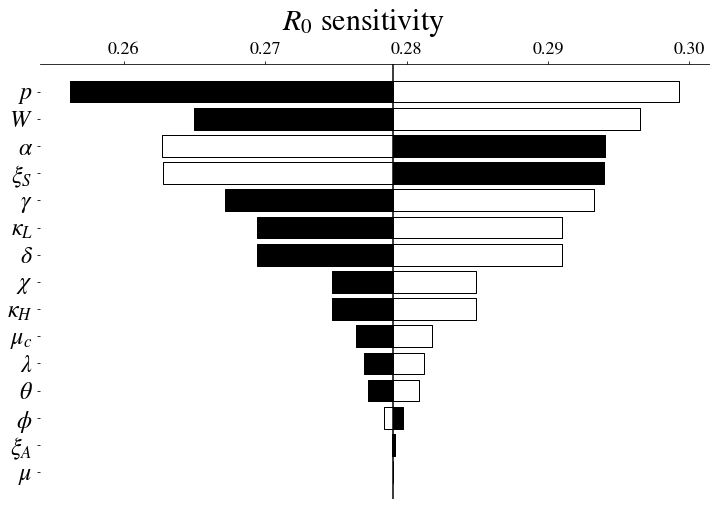

In [3]:
from numpy import *
from matplotlib import pyplot as plt
#mpl.rc('font',family='Times New Roman')

mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral' 

dpd = .15

dp = [
    p*.055,
    W*dpd,
    alpha*dpd,
    xiS*dpd,
    gamma*dpd,
    kL*dpd,
    delta*dpd,
    chi*dpd,
    kH*dpd,
    muC*dpd,
    lam*dpd,
    theta*dpd,
    phi*dpd,
    xiA*dpd,
    mu*dpd]

variables = [
    r'$p$',
    r'$W$',
    r'$\alpha$',
    r'$\xi_S$',
    r'$\gamma$',
    r'$\kappa_L$',
    r'$\delta$',
    r'$\chi$',   
    r'$\kappa_H$',    
    r'$\mu_c$',
    r'$\lambda$',
    r'$\theta$',
    r'$\phi$',
    r'$\xi_A$',
    r'$\mu$']

d = [p,W,alpha,xiS,gamma,kL,delta,chi,kH,muC,lam,theta,phi,xiA,mu]

g41 = (d[3]+(d[11]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[11])*(-1+d[10])+d[14]+d[9]))
g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
g13 = -((-1+d[0])*d[2]*d[5])/(d[6]*(d[5])**2)
g23 = ((d[0])*(d[2]*d[5]))/((d[6])*(d[5])**2)
g14 = -((-1+d[0])*d[2]*d[8]) / ((d[8]**2)*d[7])
g24 = (d[0]*d[2]*d[8]) / ((d[8]**2)*d[7])
g43 = 1

# Turn on to check upper end sensitivity

# for i in range(len(d)):
#     d[i] += dp[i]

R0 = ((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
-108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
+g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))

base = R0

lows = zeros((len(d),1))
highs = zeros((len(d),1))
for i in range(len(d)):
    # low end
    d[i] = d[i] - dp[i]
    
    g41 = (d[3]+(d[11]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[11])*(-1+d[10])+d[14]+d[9]))
    g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
    g13 = -((-1+d[0])*d[2]*d[5])/(d[6]*(d[5])**2)
    g23 = ((d[0])*(d[2]*d[5]))/((d[6])*(d[5])**2)
    g14 = -((-1+d[0])*d[2]*d[8]) / ((d[8]**2)*d[7])
    g24 = (d[0]*d[2]*d[8]) / ((d[8]**2)*d[7])
    g43 = 1
    
    R0L = ((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
-108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
+g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))
    d[i] = d[i] + dp[i]
    
    # High end
    d[i] = d[i] + dp[i]
    
    g41 = (d[3]+(d[11]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[11])*(-1+d[10])+d[14]+d[9]))
    g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
    g13 = -((-1+d[0])*d[2]*d[5])/(d[6]*(d[5])**2)
    g23 = ((d[0])*(d[2]*d[5]))/((d[6])*(d[5])**2)
    g14 = -((-1+d[0])*d[2]*d[8]) / ((d[8]**2)*d[7])
    g24 = (d[0]*d[2]*d[8]) / ((d[8]**2)*d[7])
    g43 = 1
    
    R0H = ((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
-108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
+g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))
    d[i] = d[i] - dp[i]
       
    
    lows[i] = R0L-base
    highs[i] = R0H-base

       

# Ploting The figure

fig = plt.figure(figsize=[12,8])

# The y position for each variable
ys = range(len(d))[::-1]  # top to bottom

# Plot the bars, one by one
for i,y, low, high in zip(range(len(variables)),ys, lows, highs):
    print(variables[i],low+base,high+base)
    
    # Each bar is a "broken" horizontal bar chart
    if (low + base) < base:
         # The width of the 'low' and 'high' pieces
        low_width = -low
        high_width = high
        plt.broken_barh(
        [(base + low,low_width), (base, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'black'],  # Try different colors if you like
        edgecolors=['black', 'black'],
        linewidth=1,
        )
    else:
        low_width = low
        high_width = -high
        plt.broken_barh(
        [(base, low_width),(base + high, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'black'],  # Try different colors if you like
        edgecolors=['black', 'black'],
        linewidth=1,
        )

# Display the value as text. It should be positioned in the center of
# the 'high' bar, except if there isn't any room there, then it should be
# next to bar instead. Comment in if want numbers included
#     x = base + high_width / 2
#     if x <= base + 50:
#         x = base + high_width + 50
#     plt.text(x, y, str(value), va='center', ha='center')

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables,fontsize=24)
plt.xticks(fontsize=18)

# title
plt.suptitle('$R_0$ sensitivity',fontsize=30)

# Set the portion of the x- and y-axes to show
#plt.xlim(0, 1)
plt.ylim(-1, len(variables))

plt.show()

# plt.savefig('C:/Professional Stuff/3) Post-Bacc/2) Brown University/tornado.jpg')

# Additional R<sub>0</sub> Plots

Text(0.5,1,'$R_0$ sensitivity for varying $\\alpha$ $&$ $\\gamma$')

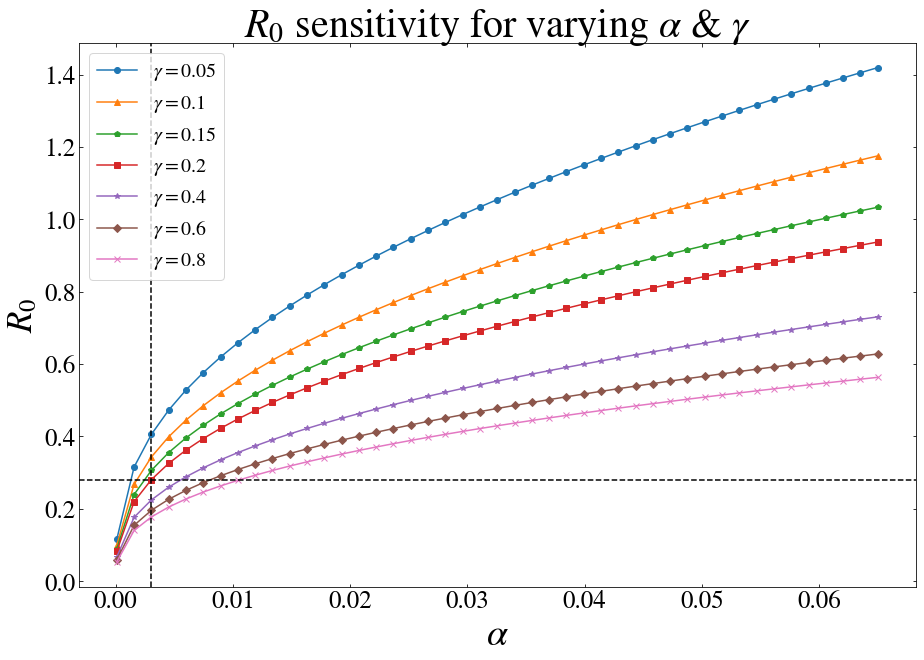

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'  

fig = plt.figure(figsize=[15,10])                 
   
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'   
                  
gamma = [0.05,0.1,0.15,0.2,0.4,0.6,0.8]                        
alpha_RNGE = np.linspace(0.0001,0.065,45)    
N = len(alpha_RNGE)  
lsn = ['o', '^','p','s','*','D','x']
lsnr = len(lsn)

for z in range(lsnr):
    each = gamma[z]

    d = [p,W,alpha_RNGE,xiS,each,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

    R_RNG = []

    for i in range(N):

        g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
        g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
        g13 = -((-1+d[0])*d[2][i]*d[5])/(d[6]*(d[5])**2)
        g23 = ((d[0])*(d[2][i]*d[5]))/((d[6])*(d[5])**2)
        g14 = - ((-1+d[0])*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g24 = (d[0]*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g43 = 1

        R0_I =((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
                -108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41\
                +g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))      
        R_RNG.append(R0_I)


    plt.plot(alpha_RNGE,R_RNG,label=r'$\gamma=$%g'%each, marker=lsn[z])        

 

plt.legend(loc='upper left',fontsize=20)
#(loc='best', prop={'size': 17})
plt.axvline(alpha, color='k', ls='--')
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,labelsize=25)
plt.axhline(R0, color='k', ls='--')
plt.xlabel(r'$\alpha$',fontsize=38)
plt.ylabel('$R_0$',fontsize=35)
plt.title(r'$R_0$ sensitivity for varying $\alpha$ $&$ $\gamma$',fontsize=40)
# p.xlim([0,0.1])
# p.ylim([0,30])


Text(0.5,1,'$R_0$ sensitivity for varying $\\alpha$ $&$ $\\xi_s$')

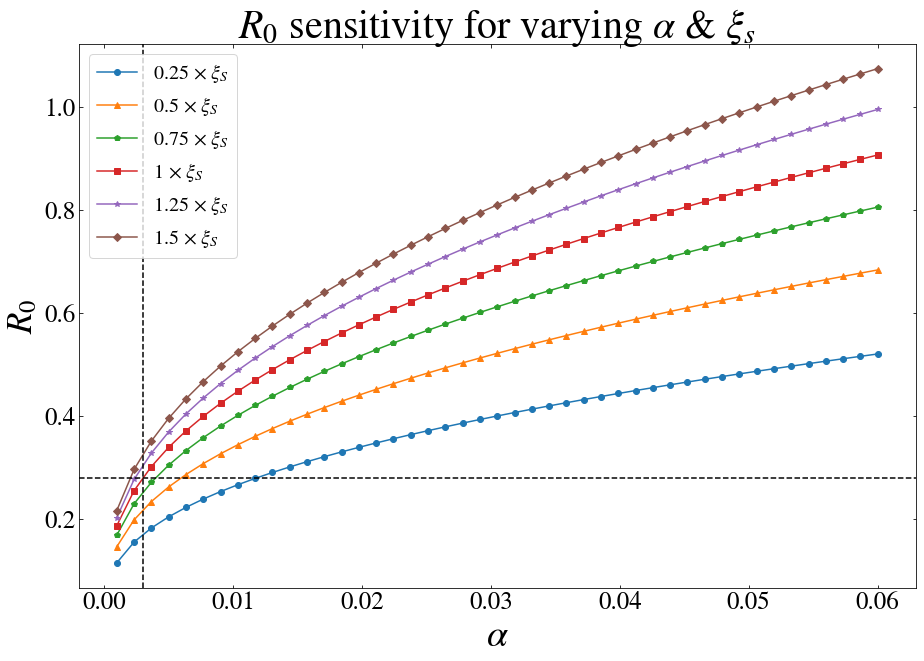

In [3]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'  

fig = plt.figure(figsize=[15,10])                 
   
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'   
                  
#xiS = [(1.3*10**11)*0.25,(1.3*10**11)*0.5,(1.3*10**11)*0.75,(1.3*10**11)*1, (1.3*10**11)*1.25,(1.3*10**11)*1.50] 
xiS = [(1.3*10**11)*0.25,(1.3*10**11)*0.5,(1.3*10**11)*0.75,(1.3*10**11)*1, (1.3*10**11)*1.25,(1.3*10**11)*1.50] 
alpha_RNGE = np.linspace(0.001,0.06,45)    
N = len(alpha_RNGE)                                  
lsn = ['o', '^','p','s','*','D']
lsnr = len(lsn)

for z in range(lsnr):
    each = xiS[z]

    d = [p,W,alpha_RNGE,each,gamma,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

    R_RNG = []
    
    for i in range(N):
   
        g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
        g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
        g13 = -((-1+d[0])*d[2][i]*d[5])/(d[6]*(d[5])**2)
        g23 = ((d[0])*(d[2][i]*d[5]))/((d[6])*(d[5])**2)
        g14 = - ((-1+d[0])*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g24 = (d[0]*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g43 = 1
        
        R0_I =((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
                -108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
                +g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))   
        
        R_RNG.append(R0_I)
        
    plt.plot(alpha_RNGE,R_RNG,label=r'%g $\times$ $\xi_S$'%(each/(1.3*10**11)),marker=lsn[z])        

 

plt.legend(loc='upper left',fontsize=20)
#(loc='best', prop={'size': 17})
plt.axvline(alpha, color='k', ls='--')
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.axhline(R0, color='k', ls='--')
plt.xlabel(r'$\alpha$',fontsize=38)
plt.ylabel('$R_0$',fontsize=35)
plt.title(r'$R_0$ sensitivity for varying $\alpha$ $&$ $\xi_s$',fontsize=40)
# p.xlim([0,0.1])
# p.ylim([0,30])


Text(0.5,1,'$R_0$ sensitivity for varying $\\alpha$ $&$ $W$ ')

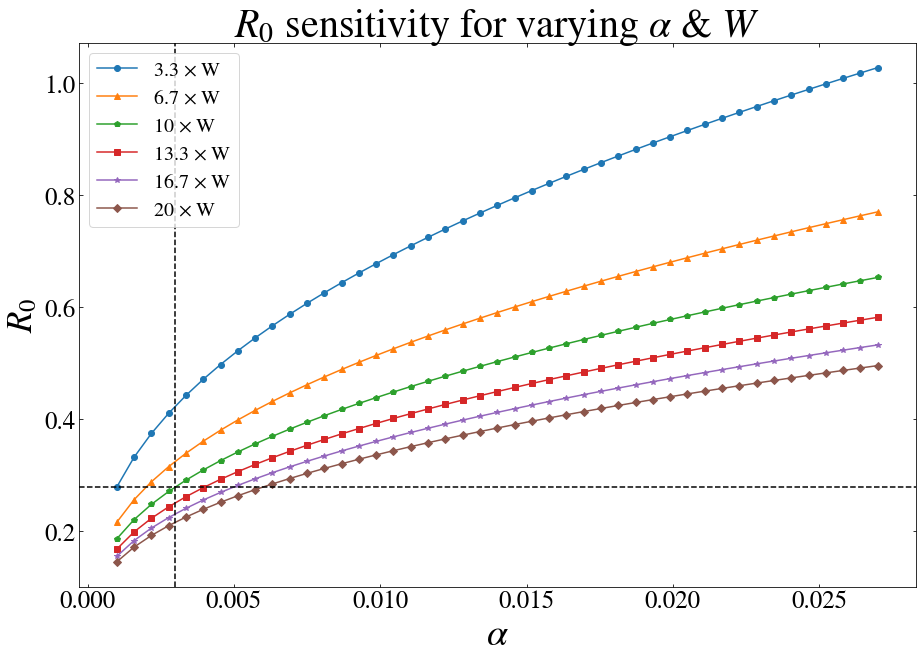

In [4]:
mpl.rcParams['mathtext.fontset'] = 'stix'                       
mpl.rcParams['font.family'] = 'STIXGeneral'    

fig = plt.figure(figsize=[15,10])                 
   
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'   
                  
W = [5*S0,10*S0,15*S0,20*S0,25*S0,30*S0] 
alpha_RNGE = np.linspace(0.001,0.027,45)    
N = len(alpha_RNGE)                                  
lsn = ['o', '^','p','s','*','D']
lsnr = len(lsn)

for z in range(lsnr):
    each = W[z]

    d = [p,each,alpha_RNGE,xiS,gamma,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

    R_RNG = []
    
    for i in range(N):
   
        g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
        g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
        g13 = -((-1+d[0])*d[2][i]*d[5])/(d[6]*(d[5])**2)
        g23 = ((d[0])*(d[2][i]*d[5]))/((d[6])*(d[5])**2)
        g14 = - ((-1+d[0])*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g24 = (d[0]*d[2][i]*d[9]) / ((d[9]**2)*d[8])
        g43 = 1
        
        R0_I =((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
                -108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
                +g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))   
        
        R_RNG.append(R0_I)
        
    plt.plot(alpha_RNGE,R_RNG,label=r'%g $\times$ W'%(round((each/(S0*1.5)),1)),marker=lsn[z])    
 

plt.legend(loc='upper left',fontsize=20)
#(loc='best', prop={'size': 17})
plt.axvline(alpha, color='k', ls='--')
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,  labelsize=25)
plt.axhline(R0, color='k', ls='--')
plt.xlabel(r'$\alpha$',fontsize=38)
plt.ylabel('$R_0$',fontsize=35)
plt.title(r'$R_0$ sensitivity for varying $\alpha$ $&$ $W$ ',fontsize=40)
# p.xlim([0,0.1])
# p.ylim([0,30])



Text(0.5,1,'$R_0$ sensitivity for varying $p$ $&$ $\\xi_S$ ')

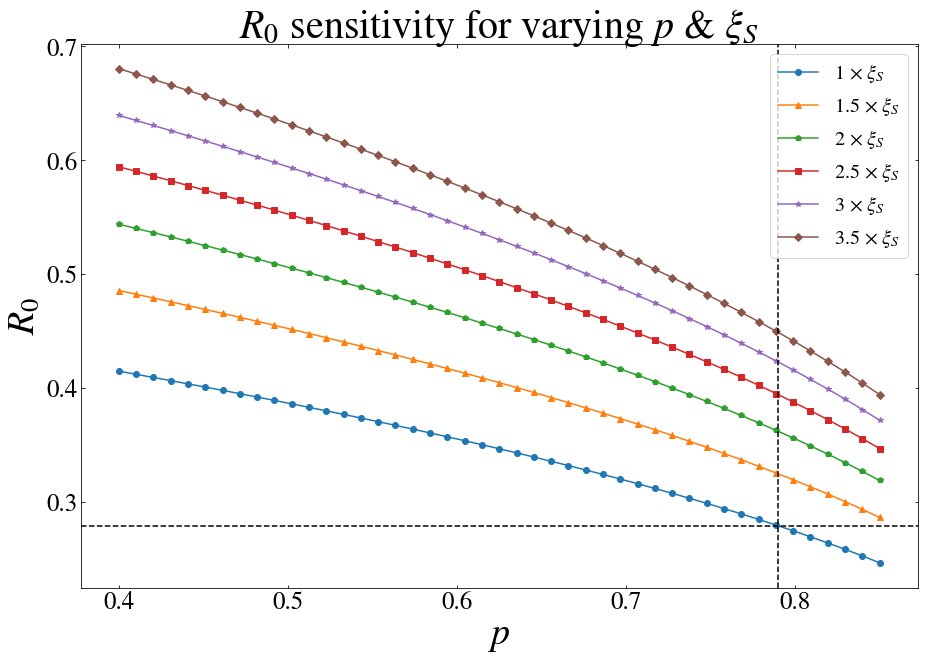

In [4]:
plt.rcParams['mathtext.fontset'] = 'stix'      
plt.rcParams['font.family'] = 'STIXGeneral'    

fig = plt.figure(figsize=[15,10])                 
   
# plt.rcParams['mathtext.fontset'] = 'dejavuserif'   
                  
xiS = [(1.3*10**11)*1,(1.3*10**11)*1.5,(1.3*10**11)*2,(1.3*10**11)*2.5,(1.3*10**11)*3, (1.3*10**11)*3.5]
p_RNGE = np.linspace(0.4,0.85,45)    
N = len(p_RNGE)                                  
lsn = ['o', '^','p','s','*','D']
lsnr = len(lsn)

for z in range(lsnr):
    each = xiS[z]

    d = [p_RNGE,W,alpha,each,gamma,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

    R_RNG = []
    
    for i in range(N):
   
        g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
        g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
        g13 = -((-1+d[0][i])*d[2]*d[5])/(d[6]*(d[5])**2)
        g23 = ((d[0][i])*(d[2]*d[5]))/((d[6])*(d[5])**2)
        g14 = - ((-1+d[0][i])*d[2]*d[9]) / ((d[9]**2)*d[8])
        g24 = (d[0][i]*d[2]*d[9]) / ((d[9]**2)*d[8])
        g43 = 1
        
        R0_I =((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
                -108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
                +g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))   
        
        R_RNG.append(R0_I)
        
    plt.plot(p_RNGE,R_RNG,label=r'%g $\times$ $\xi_S$'%(each/(1.3*10**11)),marker=lsn[z])    
 

plt.legend(loc='upper right',fontsize=20)
#(loc='best', prop={'size': 17})
plt.axvline(p, color='k', ls='--')
plt.tick_params(axis = 'both', direction = 'in', top = 1, right = 1,labelsize=25)
plt.axhline(R0, color='k', ls='--')
plt.xlabel(r'$p$',fontsize=38)
plt.ylabel('$R_0$',fontsize=38)
plt.title(r'$R_0$ sensitivity for varying $p$ $&$ $\xi_S$ ',fontsize=40)
# p.xlim([0,0.1])
# p.ylim([0,30])


# R<sub>0</sub> Contour Plots Test

In [12]:
import matplotlib.cm as cm

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

x = np.linspace(0.001,0.027,40)          # alpha Axis
y = np.linspace(2000000,12000000,40)     # W Axis

X,Y = np.meshgrid(x,y)

# list then Mesh grid It  ... it should be 1,1 1,2 1,3 1,4 1,5 1,5 1,6 1,7 1,8 1,9 and so on.....

z1 = []

for i in range(len(x)):
    
    for j in range(len(x)):
    
        d = [p,Y[i,j],X[i,j],xiS,gamma,kL,delta,lam,chi,kH,theta,muC,phi,xiA,mu]

        g41 = (d[3]+(d[10]*d[3])*(-1+d[12]))/(d[1]*(d[4]+(d[4]*d[10])*(-1+d[7])+d[14]+d[11]))
        g42 = (d[13])/((d[1]*d[4])+(d[1]*d[14]))
        g13 = -((-1+d[0])*d[2]*d[5])/(d[6]*(d[5])**2)
        g23 = ((d[0])*(d[2]*d[5]))/((d[6])*(d[5])**2)
        g14 = - ((-1+d[0])*d[2]*d[9]) / ((d[9]**2)*d[8])
        g24 = (d[0]*d[2]*d[9]) / ((d[9]**2)*d[8])
        g43 = 1

        Z = ((2**(1/3))*(g14*g41+g24*g42))/(27*g13*g41+27*g23*g42+sqrt(729*(g13*g41+g23*g42)**2 \
        -108*(g14*g41+g24*g42)**3))**(1/3)+(1/(3*2**(1/3)))*((27*g13*g41+27*g23*g42+sqrt(729*(g13*g41 \
        +g23*g42)**2-108*(g14*g41+g24*g42)**3))**(1/3))
    
        z1.append(Z)
    
z5 = np.reshape(z1,(len(x),len(x)))
    
fig, ax = plt.subplots(figsize=[10,6])

CS = ax.contour(X, Y, z5, [0.5,1,1.5,2,2.5,3], colors=('C0','C1','C2','C3','C4','C5'))
ax.clabel(CS, inline=1, fontsize=18)

plt.axhline(Z, color='k', ls='--')
plt.axvline(alpha, color='k', ls='--')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel('$\alpha$',fontsize=25)
plt.ylabel('$W$',fontsize=25)
ax.set_title('$W$ and $\alpha$ Space with $R_0$ Contours',fontsize=30)
plt.tick_params(labelsize=20,axis='both',direction='in',top=1,right=1)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000000007E8AD08> (for post_execute):


ValueError: 
$lpha$
^
Expected end of text (at char 0), (line:1, col:1)

ValueError: 
$lpha$
^
Expected end of text (at char 0), (line:1, col:1)

<Figure size 720x432 with 1 Axes>